In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 14 # 끝시간
n = 140 # 격자 개수 
h = (tf-t0) / n # 격자 간격(0 ~ 14까지 140개로 나누기)
time = np.linspace(t0, tf, n+1) # 시작점, 끝점, 점의 개수(간격수 + 1)의 3가지 변수로 벡터를 생성할 수 있다.

In [3]:
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. ])

In [4]:
# 상태 변수 S, I, R
#               행렬생성
#                            S         I    R
initial_value = np.array([51839994.0, 6.0, 0.0])
# [S, I, R] S = N(전체 인구수 - I(감염된 인구수)) 감염될 인구수
x = np.array((n+1)*[initial_value])
#           초기값(1*3행렬)을 n+1시간 개수만큼 행방향 생성(결국(n+1)*3 행렬)

In [5]:
x

array([[5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.0000000e+00, 0.0000000e+00],
       [5.1839994e+07, 6.000

In [6]:
# 나머지 변수
N = 51840000
beta = 0.4 ## 감염상수
gamma = 1/14 ## 회복률

In [7]:
def f(u): 
    S, I, R = u # u = x[i] 
    N = sum(u)
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

In [22]:
def rk4(model, N0, t0, tf, n):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[N0])
    h = time[1] - time[0]
    for i in range(n):
        k0 = model(x[i]) # f(x[0]) => f(51839994, 6, 0)
        k1 = model(x[i] + 0.5 * k0 * h)
        k2 = model(x[i] + 0.5 * k1 * h)
        k3 = model(x[i] + k2 * h)
        x[i+1] = x[i] + h * (k0 + 2 * (k1 + k2) + k3) / 6
    return time, x

In [23]:
N_time, N_x = rk4(f, initial_value, t0, tf, n)

In [24]:
N_x

array([[5.18399940e+07, 6.00000000e+00, 0.00000000e+00],
       [5.18399938e+07, 6.20041737e+00, 4.35689991e-02],
       [5.18399935e+07, 6.40752925e+00, 8.85933289e-02],
       [5.18399932e+07, 6.62155927e+00, 1.35121602e-01],
       [5.18399930e+07, 6.84273852e+00, 1.83204053e-01],
       [5.18399927e+07, 7.07130578e+00, 2.32892598e-01],
       [5.18399924e+07, 7.30750786e+00, 2.84240884e-01],
       [5.18399921e+07, 7.55159976e+00, 3.37304351e-01],
       [5.18399918e+07, 7.80384504e+00, 3.92140291e-01],
       [5.18399915e+07, 8.06451604e+00, 4.48807911e-01],
       [5.18399912e+07, 8.33389420e+00, 5.07368393e-01],
       [5.18399908e+07, 8.61227037e+00, 5.67884964e-01],
       [5.18399905e+07, 8.89994511e+00, 6.30422964e-01],
       [5.18399901e+07, 9.19722901e+00, 6.95049914e-01],
       [5.18399897e+07, 9.50444305e+00, 7.61835591e-01],
       [5.18399893e+07, 9.82191893e+00, 8.30852103e-01],
       [5.18399889e+07, 1.01499994e+01, 9.02173966e-01],
       [5.18399885e+07, 1.04890

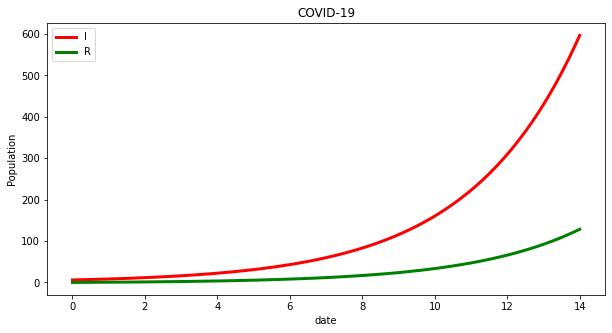

In [25]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t = N_time
I_t = N_x[:, 1] # 모든 2열 I가져오기
R_t = N_x[:, 2] # 모든 3열 R가져오기
lines = plt.plot(t, I_t, 'r', t, R_t, 'g')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], linewidth = 3) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('I', 'R'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

# 고정점과 안정성 검사 시뮬레이션 테스트

In [26]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 1000 # 끝시간 (최대한 길게)
n = 10000 # 격자 개수 
h = (tf-t0) / n # 격자 간격(0 ~ 1000까지 10000개로 나누기)
time = np.linspace(t0, tf, n+1) # 시작점, 끝점, 점의 개수(간격수 + 1)의 3가지 변수로 벡터를 생성할 수 있다.
# 상태 변수 S, I, R
#               행렬생성
#                            S         I    R
initial_value = np.array([51839994.0, 6.0, 0.0])
# [S, I, R] S = N(전체 인구수 - I(감염된 인구수)) 감염될 인구수
x = np.array((n+1)*[initial_value])
#           초기값(1*3행렬)을 n+1시간 개수만큼 행방향 생성(결국(n+1)*3 행렬)
# 나머지 변수
N = 51840000
beta = 0.4 # 감염상수
gamma = 1/14 # 회복률
delta = 1/229 # 1/재감염 평균일수

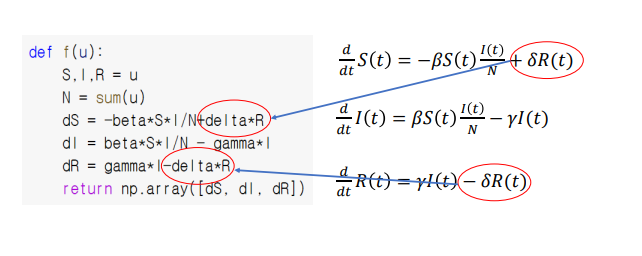

In [27]:
def f(u): 
    S, I, R = u # u = x[i] 
    N = sum(u)
    dS = -beta * S * I/N + delta * R
    dI = beta * S * I/N - gamma * I
    dR = gamma * I - delta * R
    return np.array([dS, dI, dR])

In [28]:
def rk4(f, initial_value, t0, tf, n):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[initial_value])
    h = time[1] - time[0]
    for i in range(n):
        k0 = f(x[i]) # f(x[0]) => f(51839994, 6, 0)
        k1 = f(x[i] + 0.5 * k0 * h)
        k2 = f(x[i] + 0.5 * k1 * h)
        k3 = f(x[i] + k2 * h)
        x[i+1] = x[i] + h * (k0 + 2 * (k1 + k2) + k3) / 6
    return time, x

In [29]:
N_time, N_x = rk4(f, initial_value, t0, tf, n)

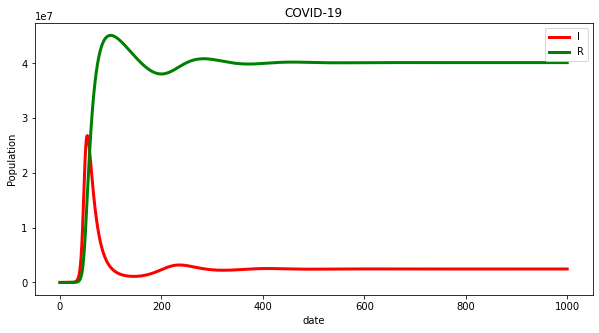

In [30]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t = N_time
I_t = N_x[:, 1] # 모든 2열 I가져오기
R_t = N_x[:, 2] # 모든 3열 R가져오기
lines = plt.plot(t, I_t, 'r', t, R_t, 'g')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], linewidth = 3) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('I', 'R'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

In [31]:
E2 = np.array([gamma * N/beta, (1 - gamma/beta) * N / (1+gamma/delta), gamma * (1-gamma/beta) * N / (delta + gamma)])

In [32]:
E2

array([ 9257142.85714286,  2453333.33333333, 40129523.80952381])

In [33]:
N_x

array([[5.18399940e+07, 6.00000000e+00, 0.00000000e+00],
       [5.18399938e+07, 6.20041737e+00, 4.35595397e-02],
       [5.18399935e+07, 6.40752925e+00, 8.85550766e-02],
       ...,
       [9.25702008e+06, 2.45328527e+06, 4.01296946e+07],
       [9.25702074e+06, 2.45328504e+06, 4.01296942e+07],
       [9.25702139e+06, 2.45328481e+06, 4.01296938e+07]])

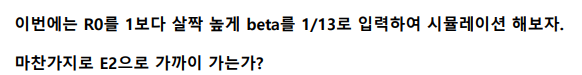

In [34]:
beta = 1/13

In [35]:
R0 = beta / gamma
R0

1.076923076923077

In [36]:
N_time, N_x = rk4(f, initial_value, t0, tf, n)

In [37]:
E2 = np.array([gamma * N/beta, (1 - gamma/beta) * N / (1+gamma/delta), gamma * (1-gamma/beta) * N / (delta + gamma)])

In [38]:
E2

array([48137142.85714285,   213333.33333333,  3489523.80952381])

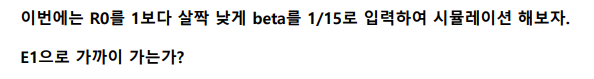

In [39]:
beta = 1/15

In [40]:
R0 = beta / gamma
R0

0.9333333333333333

In [41]:
N_time, N_x = rk4(f, initial_value, t0, tf, n)

In [42]:
E2 = np.array([gamma * N/beta, (1 - gamma/beta) * N / (1+gamma/delta), gamma * (1-gamma/beta) * N / (delta + gamma)])

In [43]:
E2

array([55542857.14285714,  -213333.33333333, -3489523.80952381])